# Importe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp


import pandas as pd
from scipy.optimize import curve_fit
import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats
from numpy import linalg as la


plt.style.use('classic')
plt.rc('text', usetex=True)

# Daten importieren
## Aus Textdateien

In [2]:
A1 = pd.read_csv('A1.txt', sep='\t')
A3 = pd.read_csv('A3.txt', sep='\t')

## Daten vom Messplatz

In [3]:
# Zusatzscheibe
m_Z = 130.403 / 1000                        # kg
m_Z_err = ufloat(130.403, 0.001) / 1000      # kg

d_Z = 50.0 / 1000                           # m
d_Z_err = ufloat(50.0, 0.1) / 1000               # m

In [4]:
# Messdraht
l_M = 2215 / 1000                           # m
l_M_err = ufloat(2215, 5) / 1000             # m

D_M = 0.3 / 1000                            # Durchmesser [m]
D_M_err = ufloat(0.3, 0.01) / 1000           # m

r_D = D_M / 2
r_D_err = D_M_err / 2
print(r_D)

0.00015


# Daten sortieren

## Messreihe aus Aufgabe 1

In [5]:
A1

,m_zn,l0,l1,m_an,l2,l3
0,50,2.640,2.800,100.0,2.710,3.090
1,100,2.800,3.015,200.0,3.090,3.440
2,150,3.015,3.210,300.0,3.440,3.765
3,200,3.210,3.375,400.0,3.765,4.100
4,250,3.375,3.540,500.0,4.100,4.325
5,300,3.540,3.684,600.0,4.325,4.659
6,350,3.684,3.845,650.0,4.659,4.810
7,400,3.845,3.995,700.0,4.810,4.959
8,450,3.995,4.150,750.0,4.959,5.112
9,500,4.150,4.305,800.0,5.112,5.293


In [6]:
# Massen
M1 = A1['m_zn'].values / 1000
M2 = A1['m_an'].values[:10] / 1000

# Längen
l0 = A1['l0'][0] / 1000
l1 = A1['l1'].values / 1000

l2 = A1['l2'][0] / 1000
l3 = A1['l3'].values[:10] / 1000
print(l0)

0.00264


In [7]:
u_M1 = 0.001 * np.array([np.sqrt(1),
               np.sqrt(1),
               np.sqrt(2),
               np.sqrt(2),
               np.sqrt(3),
               np.sqrt(3),
               np.sqrt(4),
               np.sqrt(4),
               np.sqrt(5),
               np.sqrt(5),
               np.sqrt(6),
               np.sqrt(6),
               np.sqrt(7),
               np.sqrt(7),
               np.sqrt(8),
               np.sqrt(8)]) / 1000
u_M2 = 0.001 * np.array([np.sqrt(1),
               np.sqrt(2),
               np.sqrt(3),
               np.sqrt(4),
               np.sqrt(5),
               np.sqrt(6),
               np.sqrt(7),
               np.sqrt(7),
               np.sqrt(8),
               np.sqrt(8)]) / 1000

In [8]:
print(l0)
# print(l1)

# print(l2)
# print(l3)

u_l0 = 5e-6 + 2e-5  # *l0
u_l1 = 5e-6 + 2e-5  # #*l1
u_l2 = 5e-6 + 2e-5  # *l2
u_l3 = 5e-6 + 2e-5  # *l3
print(u_l0)
print(u_l1)
l0_err = unp.uarray(l0, u_l0)
l1_err = unp.uarray(l1, u_l1)
l2_err = unp.uarray(l2, u_l2)
l3_err = unp.uarray(l3, u_l3)

0.00264
2.5e-05
2.5e-05


In [9]:
# Delta l
u_dl_1 = np.sqrt(u_l1**2 + u_l0**2 + 0.005**2 / 1000**2)
u_dl_2 = np.sqrt(u_l3**2 + u_l2**2 + 0.005**2 / 1000**2)
print(f'Fehler erster Plot: \n{u_dl_1}\n\n')
print(f'Ablese Fehler: \n{0.005 / 1000}\n\n')
print(f'Fehler zweiter Plot: \n{u_dl_2}\n\n')


delta_l_1 = l1 - l0
delta_l_2 = l3 - l2

# print(delta_l_1)
# print(delta_l_2)


delta_l_1_err = l1_err - l0_err
delta_l_2_err = l3_err - l2_err

print(delta_l_1_err)

Fehler erster Plot: 
3.570714214271425e-05


Ablese Fehler: 
5e-06


Fehler zweiter Plot: 
3.570714214271425e-05


[0.00015999999999999999+/-3.535533905932738e-05
 0.00037500000000000033+/-3.535533905932738e-05
 0.0005700000000000002+/-3.535533905932738e-05
 0.000735+/-3.535533905932738e-05
 0.0009000000000000002+/-3.535533905932738e-05
 0.0010440000000000002+/-3.535533905932738e-05
 0.0012050000000000003+/-3.535533905932738e-05
 0.0013550000000000003+/-3.535533905932738e-05
 0.00151+/-3.535533905932738e-05
 0.0016649999999999998+/-3.535533905932738e-05
 0.0018400000000000005+/-3.535533905932738e-05
 0.002012+/-3.535533905932738e-05 0.00215+/-3.535533905932738e-05
 0.0023290000000000003+/-3.535533905932738e-05
 0.0024800000000000004+/-3.535533905932738e-05
 0.002653+/-3.535533905932738e-05]


## Messreihe aus Aufgabe 3

In [10]:
A3

,m1,T0,u_m1,m2,Tz,u_m2,u_t_r,Periode
0,50,40.53,0.001,180.403,76.16,0.0014,0.6,6
1,50,37.37,0.001,180.403,75.66,0.0014,0.6,6
2,50,37.06,0.001,180.403,76.00,0.0014,0.6,6
3,50,37.35,0.001,180.403,76.06,0.0014,0.6,6
4,50,37.13,0.001,180.403,75.82,0.0014,0.6,6
5,50,37.16,0.001,180.403,75.63,0.0014,0.6,6


In [12]:
# Anzahl der Perioden
Periode = A3['Periode'].values

# Massen
m1 = A3['m1'].values
u_m1 = A3['u_m1'].values

m2 = A3['m2'].values
u_m2 = A3['u_m2'].values

# Zeit
RZ = A3['u_t_r'].values / Periode           # Reaktionszeit

T0 = A3['T0'].values / Periode

TZ = A3['Tz'].values / Periode              # Grober Messfehler: Masse aus 50g + zusatzscheibe

In [13]:
# Unsicherheit der gemessenen Zeit
u_t0 = np.sqrt(RZ**2 + (0.01 + 5e-4 * T0)**2)
u_tz = np.sqrt(RZ**2 + (0.01 + 5e-4 * TZ)**2)
print(u_t0)
print(u_tz)

[0.10089082 0.10085624 0.10085289 0.10085602 0.10085364 0.10085397]
[0.10132726 0.10132055 0.10132511 0.10132592 0.10132269 0.10132014]


In [14]:
T0_err = unp.uarray(T0, u_t0).mean()
TZ_err = unp.uarray(TZ, u_tz).mean()
print(T0_err)
print(TZ_err)

6.29+/-0.04
12.65+/-0.04


In [15]:
T0 = T0.mean()
TZ = TZ.mean()
print(T0)

6.294444444444444


# Regression

In [16]:
def f(x, a, b):
    f = a * x + b
    return f


def f1(x, a):
    f = a * x
    return f

## erste Messreihe A1

In [17]:
print((u_dl_1))
print(len(delta_l_1))
print(len(M1))
pop, cov = curve_fit(f1, M1, delta_l_1)# ,sigma=u_dl_1
a_1 = pop
da_1 = np.sqrt(np.diag(cov))
print(f'Steigung: a={ufloat(a_1, da_1)}')
# print(f'Achsenabschnitt: b={ufloat(b_1,db_1)}')

3.570714214271425e-05
16
16
Steigung: a=0.003348+/-0.000019


In [18]:
# test
pop, cov = curve_fit(f1, M1, delta_l_1)     # ,sigma=u_dl_1
a = pop
da = np.sqrt(np.diag(cov))
print(f'Steigung: a={ufloat(a, da)}')

Steigung: a=0.003348+/-0.000019


In [19]:
f1(unp.uarray(M1, u_M1), ufloat(a_1, da_1))

array([0.00016739772727564396+/-9.451207779724901e-07,
       0.0003347954545512879+/-1.890232661188136e-06,
       0.0005021931818269318+/-2.8353484976278406e-06,
       0.0006695909091025758+/-3.780462357449186e-06,
       0.0008369886363782198+/-4.725577798565067e-06,
       0.0010043863636538637+/-5.67069205370946e-06,
       0.0011717840909295076+/-6.615807325400822e-06,
       0.0013391818182051517+/-7.560921749969541e-06,
       0.0015065795454807956+/-8.50603692753616e-06,
       0.0016739772727564395+/-9.451151446229545e-06,
       0.0018413750000320836+/-1.0396266563898593e-05,
       0.0020087727273077273+/-1.134138114248951e-05,
       0.0021761704545833712+/-1.2286496218691007e-05,
       0.002343568181859015+/-1.323161083874945e-05,
       0.0025109659091346595+/-1.4176725884541412e-05,
       0.0026783636364103034+/-1.512184053500938e-05], dtype=object)

In [22]:
# chi
zähler = ((delta_l_1 - f1(M1, a_1)) * 1000)**2
nenner = (u_dl_1 * 1000)**2
chi_test = zähler / nenner.sum()
print(round(chi_test.sum(), 2))

chi_sq_1 = ((delta_l_1 - f1(M1, a_1))**2 / (u_dl_1)**2).sum()
# print(chi_sq_1/(len(delta_l_1)-2))
chi_sq_1 = round(chi_sq_1 / (len(delta_l_1) - 2), 5)
print(chi_sq_1)

15.72
1.12293


## zweite Messreihe

In [23]:
pop, cov = curve_fit(f1, M2, delta_l_2)     # ,sigma=u_dl_2
a_2 = pop
da_2 = np.sqrt(np.diag(cov))
print(f'Steigung: a={ufloat(a_2, da_2)}')
# print(f'Achsenabschnitt: b={ufloat(b_1,db_2)}')

Steigung: a=0.003253+/-0.000031


In [24]:
print(u_M2)
f1(unp.uarray(M2, u_M2), ufloat(a_2, da_2))

[1.00000000e-06 1.41421356e-06 1.73205081e-06 2.00000000e-06
 2.23606798e-06 2.44948974e-06 2.64575131e-06 2.64575131e-06
 2.82842712e-06 2.82842712e-06]


array([0.00032530909090078156+/-3.1127351073116546e-06,
       0.0006506181818015631+/-6.225468514735342e-06,
       0.0009759272727023446+/-9.338201922158874e-06,
       0.0013012363636031262+/-1.245093532958237e-05,
       0.0016265454545039077+/-1.5563668737005848e-05,
       0.0019518545454046891+/-1.8676402144429318e-05,
       0.00211450909085508+/-2.0232768978901706e-05,
       0.0022771636363054706+/-2.1789135551852784e-05,
       0.0024398181817558615+/-2.334550236889042e-05,
       0.0026024727272062525+/-2.490186895927625e-05], dtype=object)

In [25]:
u_f1 = np.array([0.3, 0.6, 0.9, 1.2, 1.6, 1.9, 2.2, 2.2, 2.3, 2.5]) * 1e-5
u_ch_sq = np.sqrt(u_dl_2**2 + u_f1**2)     # /1000
print(u_ch_sq)

[3.58329457e-05 3.62077340e-05 3.68239053e-05 3.76696164e-05
 3.91279951e-05 4.04474968e-05 4.19404340e-05 4.19404340e-05
 4.24735212e-05 4.35889894e-05]


In [26]:
# chi
chi_sq_2=((delta_l_2-f1((M2),a_2))**2/(u_ch_sq)**2).sum()
print(chi_sq_2/(len(delta_l_2)-2))
chi_sq_2=round(chi_sq_2/(len(delta_l_2)-2),5)
print(chi_sq_2)

2.3693294689204905
2.36933


In [27]:
pop,cov=curve_fit(f1,M2,delta_l_2)# ,sigma=u_dl_2
a2=pop
da2=np.sqrt(np.diag(cov))
print(f'Steigung: a={ufloat(a2,da2)}')

Steigung: a=0.003253+/-0.000031


In [28]:
print(M2)
print(delta_l_2)

[0.1  0.2  0.3  0.4  0.5  0.6  0.65 0.7  0.75 0.8 ]
[0.00038  0.00073  0.001055 0.00139  0.001615 0.001949 0.0021   0.002249
 0.002402 0.002583]


# Mit Statsmodels

## erster PLot

In [29]:
x_zunahme=sm.add_constant(M1)
results=sm.WLS(delta_l_1,x_zunahme,weights=u_dl_1).fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           4.24e-23
Time:                        15:14:20   Log-Likelihood:                 149.58
No. Observations:                  16   AIC:                            -295.2
Df Residuals:                      14   BIC:                            -293.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.965e-05   1.18e-05      5.049      0.0

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Zweiter PLot

In [30]:
x_zunahme=sm.add_constant(M2)
results=sm.OLS(delta_l_2,x_zunahme).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6495.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           6.26e-13
Time:                        15:14:21   Log-Likelihood:                 91.889
No. Observations:                  10   AIC:                            -179.8
Df Residuals:                       8   BIC:                            -179.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001    2.1e-05      5.150      0.0

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Plots
Die Fitparameter und das $\chi^2/dof$ kann ich als extra plot mit weißen PUnkt machen

## erste Messreihe A1

In [31]:
mm=np.linspace(0.0,0.85,100) # Masse für Regression
#h1=a_1*mm                    # Regressionsgerade für M1

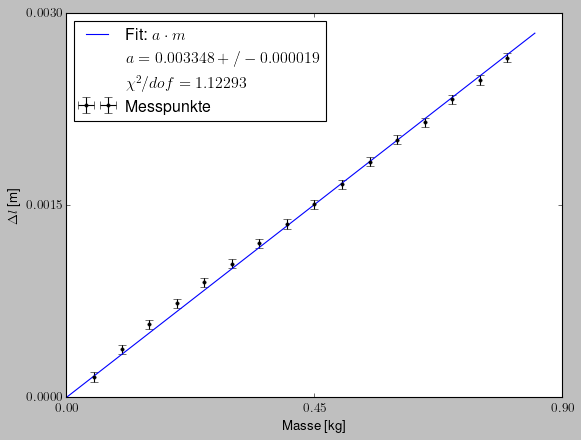

In [32]:
fig=plt.figure()
plt.errorbar(M1,delta_l_1,fmt='k.',yerr=u_dl_1,xerr=u_M1,capsize=4,label='Messpunkte')
#plt.plot(mm,f1(mm,a_1),label=r'Fit: $a \cdot m+b$')
plt.plot(mm,f1(mm,a),label=r'Fit: $a \cdot m$')
plt.plot([],[],'w',label=fr'$a={ufloat(a_1,da_1)}$')
#plt.plot([],[],'w',label=fr'$b={ufloat(b_1,db_1)}$')
plt.plot([],[],'w',label=fr'$\chi^{2}/dof={chi_sq_1}$')           #mm
plt.xticks(np.arange(0.00,0.91,step=0.45))
plt.yticks(np.arange(0.0,0.0031,step=0.0015))
plt.xlabel('Masse [kg]')
plt.ylabel(r'$\Delta l$ [m]')
plt.legend(loc=2)
plt.show()
# fig.savefig('M3_Ben_MR1.pdf',dpi=600)

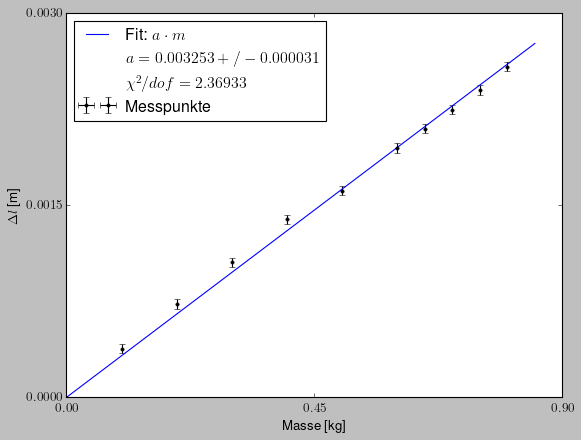

In [34]:
fig=plt.figure()
plt.errorbar(M2,delta_l_2,yerr=u_dl_2,xerr=u_M2,fmt='k.',label='Messpunkte')
plt.plot(mm,f1(mm,a2),label=r'Fit: $a \cdot m$')
plt.plot([],[],'w',label=fr'$a={ufloat(a_2,da_2)}$')
#plt.plot([],[],'w',label=fr'$b={ufloat(b_2,db_2)}$')
plt.plot([],[],'w',label=fr'$\chi^{2}/dof={chi_sq_2}$')           #mm
plt.xticks(np.arange(0.00,0.91,step=0.45))
plt.yticks(np.arange(0.0,0.0031,step=0.0015))
plt.xlabel('Masse [kg]')
plt.ylabel(r'$\Delta l$ [m]')
plt.legend(loc=2)
plt.show()
# fig.savefig('M3_Ben_MR2.pdf',dpi=600)

# Berechnungen

## Aufgabe 2

$$ a=\frac{1}{E}\frac{l}{A}g$$

In [35]:
g=9.8130
g_err=ufloat(9.8130, 0.0001)

a_1_err=ufloat(a_1,da_1)
a_2_err=ufloat(a_2,da_2)

In [36]:
E_1=1/(a_1*(r_D)**2*np.pi)*g*l_M
print(f'E={E_1}\n')
print(f'a={a_1}')
print(f'r={r_D}')
print(f'g={g}')
print(f'l={l_M}')


E=[9.1846706e+10]

a=[0.00334795]
r=0.00015
g=9.813
l=2.215


In [37]:
E_1_err=1/(a_1_err*(r_D_err)**2*np.pi)*g_err*l_M_err
print(E_1_err)

(9.2+/-0.6)e+10


In [38]:
E_2=1/(a_2*(r_D)**2*np.pi)*g*l_M
print(E_2)

[9.4525055e+10]


In [39]:
E_2_err=1/(a_2_err*(r_D_err)**2*np.pi)*g_err*l_M_err
print(E_2_err)

(9.5+/-0.6)e+10


## Mittelung von E

In [40]:
E=np.array([E_1[0],E_2[0]])
print(E)
weights=[0.6e10,0.7e10]
print(weights)
E_mean=np.average(E,weights=weights)
print(E_mean)
u_E=np.sqrt(0.6e10**2+0.7e10**2)
p= 1/u_E**2

u=np.sqrt(p*u_E**2/p).sum()
print(u)
print(ufloat(E_mean,u))

E_mean_err=ufloat(E_mean,u_E)
print(E_mean_err)

[9.1846706e+10 9.4525055e+10]
[6000000000.0, 7000000000.0]
93288893930.0213
9219544457.292887
(9.3+/-0.9)e+10
(9.3+/-0.9)e+10


In [41]:
E=np.array([E_1_err,E_2_err]).mean()
print(E)

(9.3+/-0.6)e+10


In [42]:
E=(E_1_err+E_2_err)/2
print(E)

(9.3+/-0.6)e+10


In [43]:
print(E_1_err,E_2_err)

(9.2+/-0.6)e+10 (9.5+/-0.6)e+10


# Aufgabe 3

In [44]:
R=D_M/2
R_err=D_M_err/2

r=d_Z/2
r_err=d_Z_err/2

print(m2/1000)

[0.180403 0.180403 0.180403 0.180403 0.180403 0.180403]


In [45]:
G=(4*np.pi*l_M)/(R**4)*((m2[0])/1000*r**2)/((TZ)**2)#-T0**2
G_err=(4*np.pi*l_M_err)/(R_err**4)*(ufloat((m2[0])/1000,u_m2[0]/1000)*r_err**2)/((TZ_err)**2)#-T0_err**2

print(G)
print(G_err)
#print(m2[0])

38752060722.19782
(3.9+/-0.5)e+10


# Berechnung von $\mu$
$$E=2G(1+\mu)\\ \mu=\frac{E}{2G}-1$$

In [46]:
mü_err=E/(2*G_err)-1
print(mü_err)
print(E)
print(G)

0.20+/-0.08
(9.3+/-0.6)e+10
38752060722.19782


# Ergebnisse

In [47]:
Sara_E_Modul=ufloat(8.58,0.06)*1e10
Saras_G_Modul=ufloat(3.6584502,0.0000005)*1e+10
Mü=ufloat(0.175,0.011)

In [48]:
Ergebnisse=pd.DataFrame({'Platz 1':[Sara_E_Modul,Saras_G_Modul,Mü],
                         'Platz 3':[E_mean_err,G_err,mü_err]},
                        index=[r'Elastizitätsmodul $E$ $\left[N m^{-2}\right]$',
                        r'Torsionsmodul $G$ $\left[N m^{-2}\right]$',r'Poissonzal $\mu$'])
print(Ergebnisse.to_latex())
Ergebnisse

\begin{tabular}{lll}
\toprule
 & Platz 1 & Platz 3 \\
\midrule
Elastizitätsmodul $E$ $\left[N m^{-2}\right]$ & (8.58+/-0.06)e+10 & (9.3+/-0.9)e+10 \\
Torsionsmodul $G$ $\left[N m^{-2}\right]$ & (3.6584502+/-0.0000005)e+10 & (3.9+/-0.5)e+10 \\
Poissonzal $\mu$ & 0.175+/-0.011 & 0.20+/-0.08 \\
\bottomrule
\end{tabular}



,Platz 1,Platz 3
Elastizitätsmodul $E$ $\left[N m^{-2}\right]$,(8.58+/-0.06)e+10,(9.3+/-0.9)e+10
Torsionsmodul $G$ $\left[N m^{-2}\right]$,(3.6584502+/-0.0000005)e+10,(3.9+/-0.5)e+10
Poissonzal $\mu$,0.175+/-0.011,0.20+/-0.08
